In [1]:
from sklearn import datasets,metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import classification_report

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/sushil/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
X=joblib.load("tfidf-5000")
y=joblib.load("y_amazon_5000")

In [4]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)
x_train,x_cv,y_train,y_cv=train_test_split(X_train,Y_train,test_size=0.3,shuffle=False)
print(x_train.shape)
#x_cv=x_cv.toarray()
print(x_cv.shape)
print(y_train.shape)
print(y_cv.shape)
print(type(x_cv))

(3495, 3314)
(1499, 3314)
(3495,)
(1499,)
(2446, 3314)
(1049, 3314)
(2446,)
(1049,)
<class 'scipy.sparse.csr.csr_matrix'>



The optimal number of neighbors is 5.


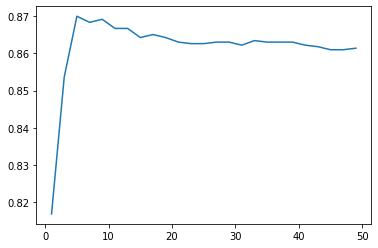

In [5]:
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores=[]
for k in neighbors:
    clf=KNeighborsClassifier(n_neighbors=k,algorithm="brute")
    scores=cross_val_score(clf,x_train,y_train,cv=6,scoring="accuracy")
    cv_scores.append(scores.mean())
MSE=[1-x for x in cv_scores]    
optimal_k=neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(neighbors,cv_scores)
plt.show()
    

the accuracy of train model 0.8303145853193518
[[ 22 167]
 [ 11 849]]
              precision    recall  f1-score   support

           0       0.67      0.12      0.20       189
           1       0.84      0.99      0.91       860

    accuracy                           0.83      1049
   macro avg       0.75      0.55      0.55      1049
weighted avg       0.81      0.83      0.78      1049



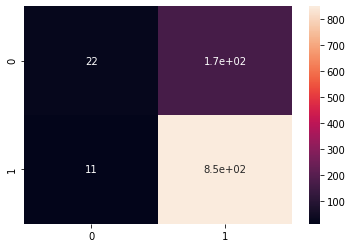

In [6]:
knn=KNeighborsClassifier(n_neighbors=optimal_k,algorithm="brute")
knn.fit(x_train,y_train)
y_pred=knn.predict(x_cv)
y_proba=knn.predict_proba(x_cv)
accuracy=accuracy_score(y_cv,y_pred)
confusion_mat=confusion_matrix(y_cv,y_pred,labels=[0,1])
classification_reports=classification_report(y_cv,y_pred,labels=[0,1])
print("the accuracy of train model",accuracy)
print(confusion_mat)
print(classification_reports)
sns.heatmap(confusion_mat,annot=True)
plt.show()

In [17]:
from sklearn.metrics import f1_score
import pickle

In [26]:
clf=KNeighborsClassifier(n_neighbors=7,algorithm="brute")
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [27]:
y_pred=clf.predict(x_cv)

In [28]:
accuracy=accuracy_score(y_cv,y_pred)*100
accuracy

82.84080076263108